In [3]:
import os
from utils import parse_documents, Document, transformer
import pickle
import matplotlib.pyplot as plt
import operator
from collections import OrderedDict
from itertools import chain
from classifer import mdl

# ignore warning in sklearn
import warnings
warnings.filterwarnings('ignore')

    

In [6]:
datapath = "reuters21578"
# get_topics(datapath,"all-topics-strings.lc.txt")
corpus_name = os.path.join(datapath,"dataset.pkl")
if os.path.exists(corpus_name):
    with open(os.path.normpath(corpus_name), "rb") as pkl:
        corpus = pickle.load(pkl)
else:
    corpus = parse_documents(datapath)
    with open(corpus_name, "wb") as _file:
        pickle.dump(corpus, _file)

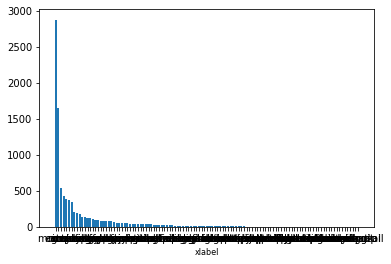

In [7]:
print("Finished extraction step")
%matplotlib inline
# some statistics
topics_in_train=OrderedDict(sorted(corpus['topics']['train'].items(), key=operator.itemgetter(1),reverse=True))
plt.bar(range(len(topics_in_train)), list(topics_in_train.values()), align='center')
plt.xticks(range(len(topics_in_train)), list(topics_in_train.keys()))
plt.xlabel('xlabel', fontsize=8)
plt.show()
#  highly skewed distribution of documents over topics


In [9]:
# all topics :
print("Running Feature extraction step")

topics=list(set(chain(corpus['topics']['train'].keys(),corpus['topics']['test'].keys())))
train_dataset, test_dataset=transformer(corpus['dataset'],labels=topics)
# classifer
print("Running classifier")

metrics=mdl(train_dataset,test_dataset)
print("Test results:")
print("Micro-average")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}"
      .format(metrics['micro']['P'], metrics['micro']['R'], metrics['micro']['f1']))
####################################
print("Macro-average")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}"
      .format(metrics['macro']['P'], metrics['macro']['R'], metrics['macro']['f1']))



Micro-average
Precision: 0.9377, Recall: 0.7867, F1-measure: 0.8556
Macro-average
Precision: 0.4759, Recall: 0.2913, F1-measure: 0.3442


In [10]:

topics_in_test=list(corpus['topics']['test'].keys())
# filter dataset based on ten most topics
n=10
n_top_most_topic=[]
for t in topics_in_train.keys():
    if n==0:
        break
    if t in topics_in_test:
        n_top_most_topic.append(t)
        n-=1

train_dataset, test_dataset = transformer(corpus['dataset'], labels=n_top_most_topic)

# classifer
metrics = mdl(train_dataset, test_dataset)
print("Micro-average after filtering")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}"
      .format(metrics['micro']['P'], metrics['micro']['R'], metrics['micro']['f1']))
####################################
print("Macro-average after filtering")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}"
      .format(metrics['macro']['P'], metrics['macro']['R'], metrics['macro']['f1']))

Micro-average after filtering
Precision: 0.9654, Recall: 0.9215, F1-measure: 0.9429
Micro-average after filtering
Precision: 0.9364, Recall: 0.8420, F1-measure: 0.8852


In [ ]:


# We have 120 topics and some of them has very small training and testing instances.
# it seems considering N-most topics, yeilds a better performance in Micro mode.
# I am wondering, if we use doc2vec method and use CNN or LSTM model as a classifier, 
# what would be the result?

